In [5]:
import numpy as np
from utils import read_raw, read_rgb, read_data
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

In [6]:
raw_path = 'data/hebing.raw'
rgb_path = 'data/hebing.png'
bands = np.arange(0, 40)
data_x, data_y = read_data(raw_path, rgb_path, shape=(692, 272, 768), setect_bands=bands)

In [8]:
data_x = data_x.reshape(-1, data_x.shape[1] * data_x.shape[2] * data_x.shape[3])
rus = RandomUnderSampler(random_state=0)
data_x, data_y = rus.fit_resample(data_x, data_y)

In [9]:
from sklearn.model_selection import train_test_split
from machine_learning import DecisionTree, predict, svm_classifier, RandomForest

In [10]:
train_x, test_x, train_y, test_y = train_test_split(data_x ,data_y, test_size=0.3, stratify=data_y)
file_name = 'models/blk_dt.p'
DecisionTree(train_x, train_y,test_x, test_y, file_name)

预测时间： 0.001994609832763672
DT训练模型评分：1.0
DT待测模型评分：0.7147321428571428
DT预测结果：[5 1 0 ... 2 3 5]
---------------------------------------------------------------------------------------------------
DT分类报告：              precision    recall  f1-score   support

           0       0.94      0.91      0.93       374
           1       0.92      0.89      0.90       373
           2       0.89      0.91      0.90       373
           3       0.51      0.52      0.51       373
           4       0.58      0.56      0.57       374
           5       0.47      0.50      0.48       373

    accuracy                           0.71      2240
   macro avg       0.72      0.71      0.72      2240
weighted avg       0.72      0.71      0.72      2240

DT混淆矩阵：[[342   1   3   4   3  21]
 [  1 333   6   8   5  20]
 [  3   3 338   2   3  24]
 [  4   6   1 195  91  76]
 [  1   5   4  91 208  65]
 [ 11  15  26  85  51 185]]


In [13]:
pic = read_raw('data/hebing.raw', shape=(692, 272, 768), setect_bands=bands)
blk_size = 4
result = []
for i in range(0, pic.shape[0], blk_size):
    for j in range(0, pic.shape[1], blk_size):
        blk = pic[i:i+blk_size, j:j+blk_size, :]
        blk = blk.reshape(-1)
        result.append(blk)
result = predict(np.array(result), file_name)
result = result.reshape(pic.shape[0] // blk_size, pic.shape[1] // blk_size)

预测时间： 0.021932125091552734


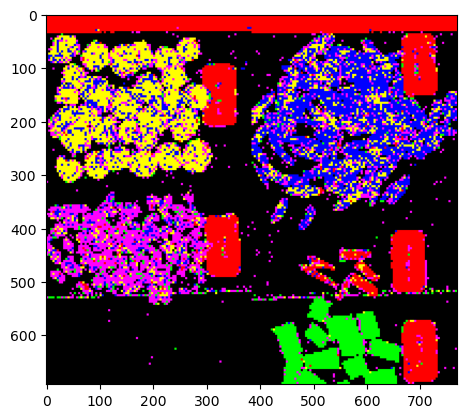

In [18]:
pre_pic_colored = np.zeros((result.shape[0], result.shape[1], 3), dtype=np.uint8)

pre_pic_colored[result == 0] = [0, 0, 0]
pre_pic_colored[result == 1] = [255, 0, 0]
pre_pic_colored[result == 2] = [0, 255, 0]
pre_pic_colored[result == 3] = [0, 0, 255]
pre_pic_colored[result == 4] = [255, 255, 0]
pre_pic_colored[result == 5] = [255, 0, 255]

pre_pic_colored = np.repeat(pre_pic_colored, blk_size, axis=0)
pre_pic_colored = np.repeat(pre_pic_colored, blk_size, axis=1)

plt.imshow(pre_pic_colored)
plt.savefig('result.png', dpi=300)